# Getting the Data Ready
This notebook is for cleaning up data, generate more columns, change data type, etc.


In [1]:
import os
import io
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#read data, specify index so it's easier to join and search using loc
path = '../../data/new-york-city-airbnb-open-data/'
listings_csv = os.path.join(path,'selected_columns_listings.csv')
listings = pd.read_csv(listings_csv, delimiter='\t', index_col = 'id')

In [22]:
#shape
listings.shape
#head
listings.head()

,scrape_id,name,picture_url,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
4662889,2.020031e+13,Pre-War Apt on Central Park West!,https://a0.muscache.com/im/pictures/be4ddf2f-1...,2.40416e+07,2014-11-22,NaN,NaN,NaN,f,Upper West Side,...,100.0,9.0,10.0,10.0,10.0,10.0,10.0,f,flexible,0.09
4663804,2.020031e+13,Cozy Room by CentralPark-Times Sq,https://a0.muscache.com/im/pictures/59490097/4...,2.41321e+07,2014-11-25,NaN,NaN,NaN,f,Hell's Kitchen,...,60.0,4.0,6.0,10.0,10.0,10.0,4.0,f,strict_14_with_grace_period,0.02
4663807,2.020031e+13,Entire 2 Bedroom Apartment - 20 min to Times Sqr,https://a0.muscache.com/im/pictures/5d8b6998-6...,4.09854e+06,2012-11-08,NaN,NaN,NaN,f,NaN,...,90.0,9.0,9.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,0.04
4666584,2.020031e+13,Unique 2 Bed/2 Bath Duplex Apt,https://a0.muscache.com/im/pictures/59009723/d...,2.41446e+07,2014-11-25,within an hour,100%,100%,t,Harlem,...,94.0,10.0,10.0,10.0,10.0,9.0,9.0,t,strict_14_with_grace_period,0.83
4666794,2.020031e+13,Cozy Bedroom in Large Apartment,https://a0.muscache.com/im/pictures/5a65bd6b-9...,1.85114e+07,2014-07-20,NaN,NaN,0%,f,Ditmars / Steinway,...,100.0,10.0,10.0,11.0,11.0,11.0,11.0,f,strict_14_with_grace_period,0.03


In [4]:
#to get all columns, set option
pd.set_option('display.max_columns', 107)
#to get text with no truncation
pd.set_option('display.max_colwidth', -1)

In [5]:
#all colums
list(listings.columns.values)

['scrape_id',
 'name',
 'picture_url',
 'host_id',
 'host_since',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'calc_neighbourhod_listing_is_wrong',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'revie

In [6]:
#new df, select only few
listings_select = listings[[
 'host_since',
  'host_response_time',
#  'calc_neighbourhod_listing_is_wrong',
#  'neighbourhood_group_cleansed',
#  'property_type',
#  'room_type',
#  'accommodates',
  'bathrooms',
  'bedrooms',
  'beds',
#  'bed_type',
#  'amenities',
 'price',
  'security_deposit',
  'cleaning_fee',
  'guests_included',
  'extra_people',
#  'calendar_updated',
  'number_of_reviews'#,
#  'review_scores_rating',
#  'review_scores_accuracy',
#  'review_scores_cleanliness',
#  'review_scores_checkin',
#  'review_scores_communication',
#  'review_scores_location',
#  'review_scores_value',
#  'instant_bookable',
#  'cancellation_policy',
# 'reviews_per_month'
]]



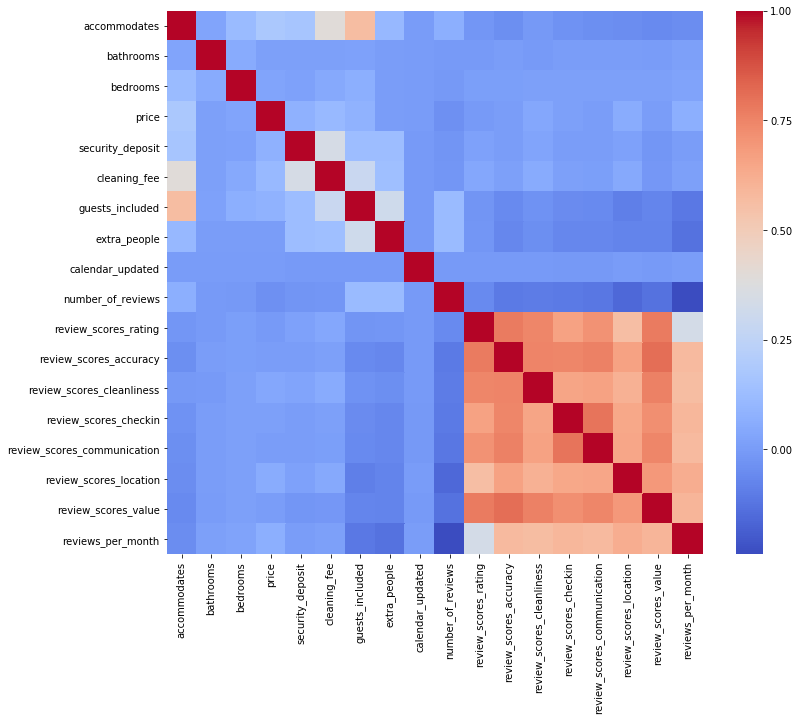

In [16]:
#heatmap for all int/float columns
plt.figure(figsize=(12,10))
correlations = listings_select.corr()
sns.heatmap(correlations,
           cmap='coolwarm');

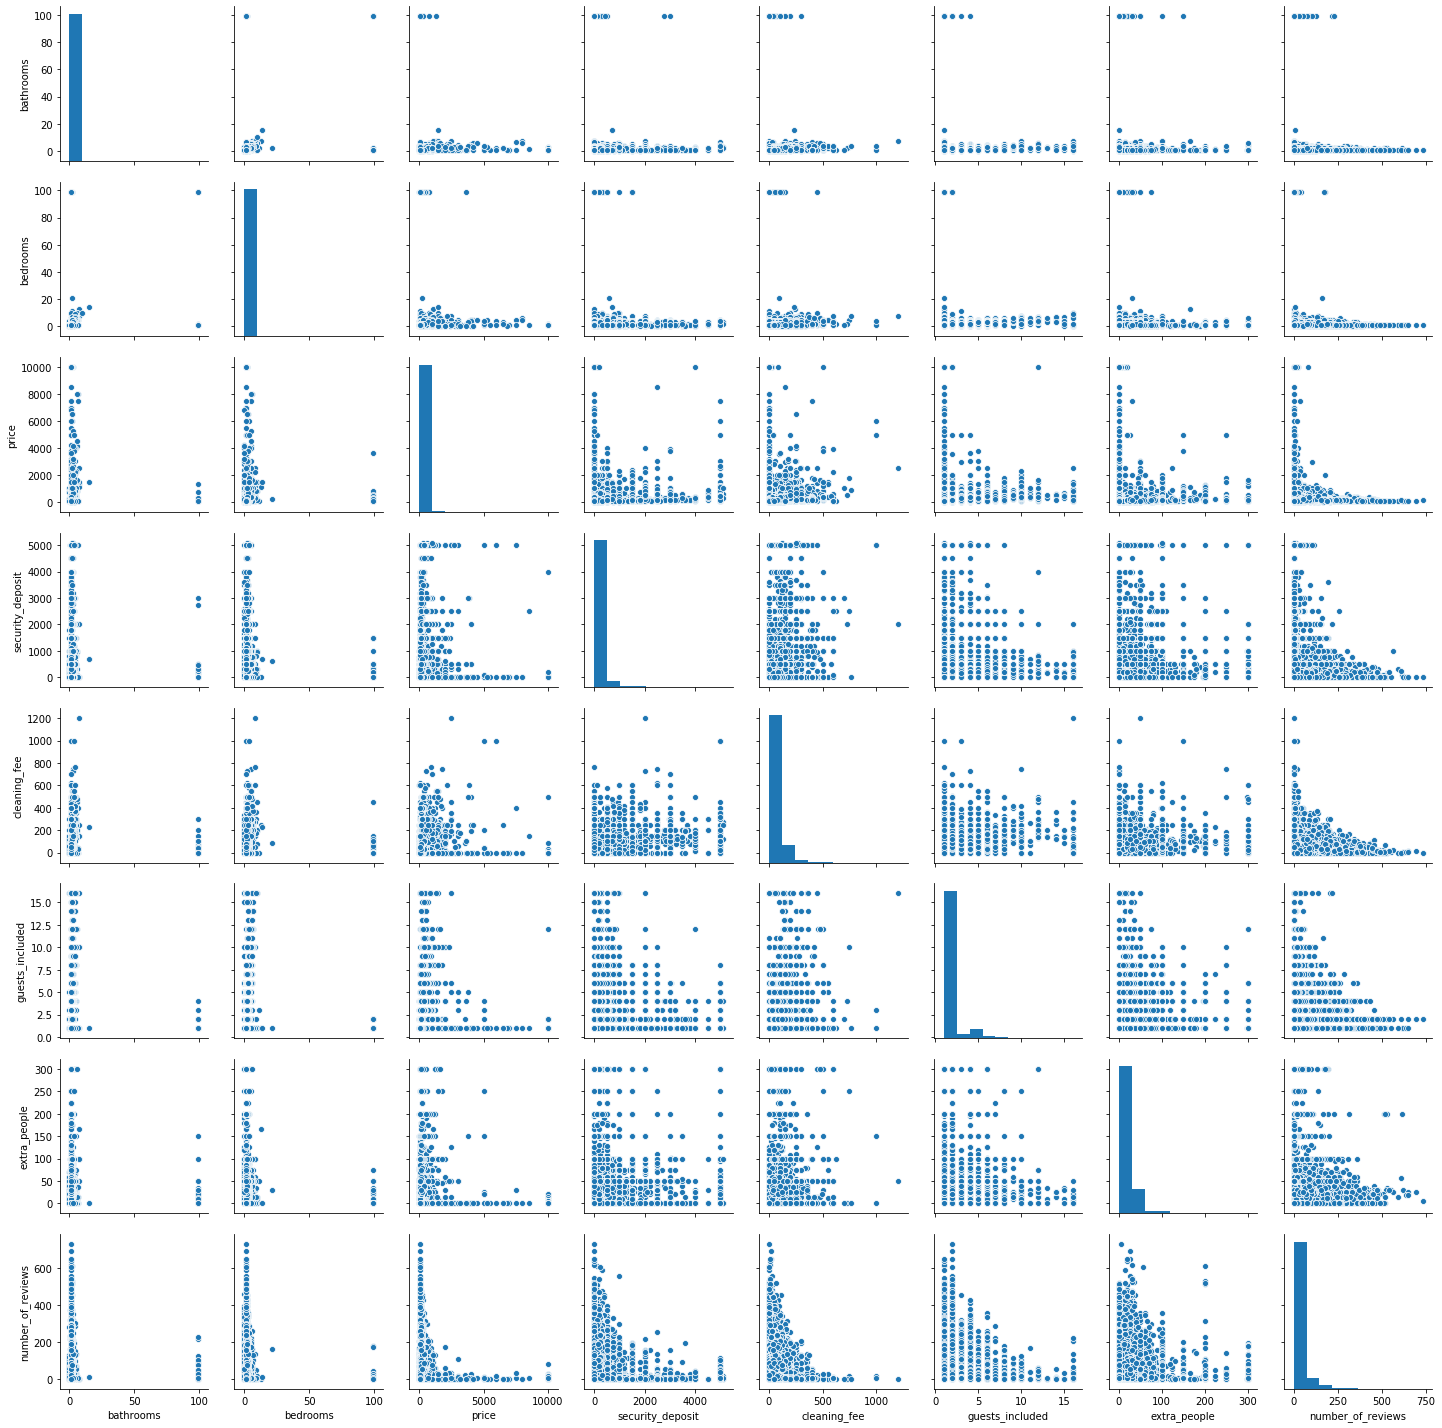

In [7]:
# Using the Seaborn Pairplot to get cross plots between different attributes
sns.pairplot(listings_select);

In [4]:
#convert values of host_verifications to list
host_verifications = listings['host_verifications'].values.tolist()

In [7]:
#host verivication split
#host_verification_ = host_verifications[0:10] -- for testing
host_verification_unique = []

for row in host_verifications:
    row_clean = row.replace('[','').replace(']','')
    methods = row_clean.split(',')
    for method in methods:
        method_clean = method.replace("'","").strip()
        if method_clean not in host_verification_unique:
            host_verification_unique.append(method_clean)

print(host_verification_unique)

['email', 'phone', 'reviews', 'jumio', 'government_id', 'work_email', 'kba', 'manual_online', 'offline_government_id', 'selfie', 'identity_manual', 'facebook', 'google', 'manual_offline', 'sent_id', 'None', 'weibo', 'sesame', 'sesame_offline', '', 'zhima_selfie', '6', '60.00']


In [5]:
#convert values of amenities to list
amenities = listings['amenities'].values.tolist()

In [10]:
#amenities split
amenities_unique = []

for row in amenities:
    row_string = str(row)
    row_string_clean = row_string.replace('{','').replace('}','')
    amenities_rows = row_string_clean.split(',')
    for row in amenities_rows:
        row_clean = row.replace('"','')
        if row_clean not in amenities_unique:
            amenities_unique.append(row_clean)
            
print(amenities_unique)

['TV', 'Cable TV', 'Internet', 'Wifi', 'Air conditioning', 'Kitchen', 'Paid parking off premises', 'Doorman', 'Elevator', 'Free street parking', 'Heating', 'Family/kid friendly', 'Washer', 'Dryer', 'Smoke detector', 'Carbon monoxide detector', 'First aid kit', 'Fire extinguisher', 'Essentials', 'Shampoo', '24-hour check-in', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Children’s books and toys', 'Hot water', 'Other', 'Buzzer/wireless intercom', 'Lock on bedroom door', 'Private entrance', 'Bed linens', 'Dishes and silverware', 'Microwave', 'Coffee maker', 'Refrigerator', 'Cooking basics', 'Oven', 'Stove', 'Long term stays allowed', 'Safety card', 'High chair', 'Pack ’n Play/travel crib', 'Luggage dropoff allowed', 'Host greets you', 'Pets allowed', 'Dishwasher', 'Free parking on premises', 'Wheelchair accessible', 'Smoking allowed', 'Hot tub', 'Breakfast', 'translation missing: en.hosting_amenity_49', 'translation missing: en.hosting_amenity_50', 'Self check-in', 'Key